

# **Introduction**

This notebook is partly a lesson and partly a coding assignment.

In this notebook we will continue with the movie analytics project.

In the assignment -EDA - data cleaning and manipulation, you should have created a combined_final_data.csv.

We are loading that dataset below

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s '/content/drive/MyDrive/Python_Project_File' '/content'

In [ ]:
final_movie_data = pd.read_csv("/content/Python_Project_File/combined_final_data.csv")
final_movie_data

,Unnamed: 0,movie_title,year,genre,duration,country,language,imdb_score,worldwide_gross_income,movie_age,tomatometer_rating
0,0,The Kid,1921,"Comedy, Drama, Family",68,USA,"English, None",83.0,0.026916,100,100.0
1,1,A Woman of Paris: A Drama of Fate,1923,"Drama, Romance",82,USA,"None, English",70.0,0.011233,98,92.0
2,2,The Gold Rush,1925,"Adventure, Comedy, Drama",95,USA,"English, None",82.0,0.026916,96,100.0
3,3,Metropolis,1927,"Drama, Sci-Fi",153,Germany,German,83.0,1.349711,94,97.0
4,4,Sunrise: A Song of Two Humans,1927,"Drama, Romance",94,USA,English,81.0,0.121107,94,98.0
...,...,...,...,...,...,...,...,...,...,...,...
7143,7143,The Sound of Silence,2019,Drama,85,USA,English,55.0,0.021994,2,65.0
7144,7144,Jexi,2019,"Comedy, Romance",84,"USA, Canada",English,61.0,9.341824,2,17.0
7145,7145,The Death of Dick Long,2019,"Comedy, Crime, Drama",100,USA,English,63.0,0.036856,2,75.0
7146,7146,The King of Staten Island,2020,"Comedy, Drama",136,USA,English,71.0,2.060358,1,74.0


Now let's move to data analytics and visualisation step of analytics life cycle for the movie analytics project.

Data analytics and Visualisation step is usually guided by our original problem statement stage and the data that we have got after cleaning.

Our initial problem statement was

`Analysing audience movie preference and earning potential of movies`

We broke down it into two parts

1. Audience prefrence analysis - Analyse audience movie preference across different dimensions like rating system, genre, language etc.

2. Movie earning potential analysis - Analyse movie earning based on audience movie preference and other dimensions like genre, year released etc.



Since this problem is very well defined so in the first step of data analytics and visualisation  we should sub divide each problem statement and solve it directly. (We  will be looking at the taxi data analytics problem to learn how to tackle open ended EDA problems later on)

# **Audience preference analysis**

The goal of this analysis is to analyse the likes and dislikes of the audience or atleast check how their preference signals (imdb and rotten tomatoes ratings) are impacted by other dimension of a movie.

We will be breaking this analysis into 5 points as shown below

1. **Comparison of rotten tomatoes and IMDB scores** - how different is scores of imdb audience and the rotten tomatoes scores - this helps in understanding how movies are preferred across different rating system. Is this similar or people and critics rated movies have wildly different ideas regarding similar movies.

2. **Rating preference across genre** - which genres are more preferable

3. **Rating preference across year released** - are old movies liked more or newer movies are liked more

4. **Rating preference across language** - Comparison of audience preference across langauges

5. **Rating prefernece across duration** - long duation movies are liked or disliked

## 1.**Comparison of rotten tomatoes and imdb ratings**

Comparing rotten tomatoes rating and imdb ratings - how different is scores of imdb audience and the rotten tomatoes scores - this helps in understanding how movies are preferred across different rating system. Is this similar or people and critics rated movies have wildly different ideas regarding similar movies.

The features that helps to solve this problem are
* imdb_score 
* tomatometer_rating

In [ ]:
final_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7148 entries, 0 to 7147
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              7148 non-null   int64  
 1   movie_title             7148 non-null   object 
 2   year                    7148 non-null   int64  
 3   genre                   7148 non-null   object 
 4   duration                7148 non-null   int64  
 5   country                 7148 non-null   object 
 6   language                7142 non-null   object 
 7   imdb_score              7148 non-null   float64
 8   worldwide_gross_income  7148 non-null   float64
 9   movie_age               7148 non-null   int64  
 10  tomatometer_rating      7143 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 614.4+ KB


Both are numerical data types.

Our question is now to analyse and compare the distribution of two numerical variables.

We could do this using 
* Box plots 
* histograms

In [ ]:
sns.set_style("whitegrid")

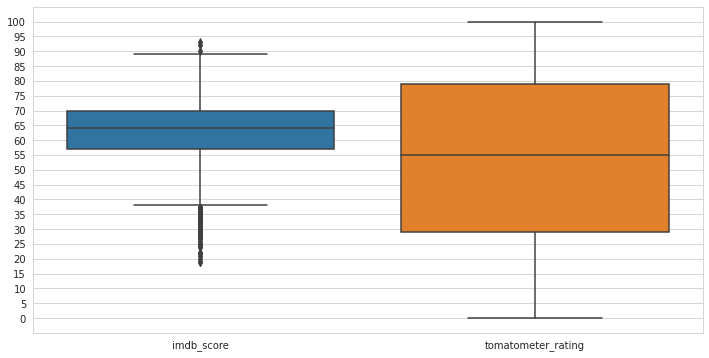

In [ ]:
plt.figure(figsize=(12,6))
plt.yticks(np.arange(0,101,5))
sns.boxplot(data = final_movie_data[['imdb_score','tomatometer_rating']])

**Analysis Point**<br>
From the above two plots we can observe that the most of the IMDB score are in a narrow band of 60 - 70 while most of the rotten tomatoes score lie in a bigger band of 30 - 80.

This might be due to the fact that audiences usually rate most of the movies averagely with less strictness i.e. movies are not usually rated at extremes

but critics have a more strict rating criteria so despite many movies being rated average, many of the other movies are either rated very high or very low.

Let's also try and draw histograms for the above 2 variables.

We will be using following bin values for the histograms

In [ ]:
bin_val = np.arange(0,101,10) # 0-10, 10-20, 20-30,.....90-100
bin_val

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

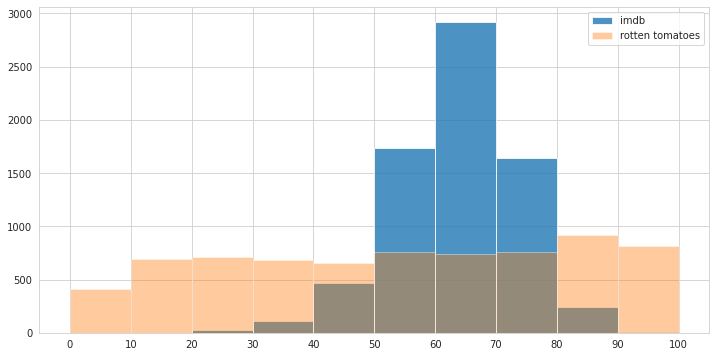

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(bin_val)
plt.hist(final_movie_data.imdb_score,alpha=0.8,bins=bin_val)
plt.hist(final_movie_data.tomatometer_rating,alpha=0.4,bins=bin_val)
plt.legend(['imdb','rotten tomatoes'])

**Final Analysis Points**<br>
Based on above 2 bar graphs we can clearly observe that imdb rating are mostly concentrated aroung the 50-70 range.

While tomatometer rating are very evenly distributed.

This also proves our initial assumption about the difference in rating behaviour of audience and critics.

Audiences usually rate most of the movies averagely with less strictness i.e. movies are not usually rated at extremes

but critics have a more strict rating criteria so despite many movies being rated average, many of the other movies are either rated very high or very low.

## **2. Ratings Preference across genre**

In this case we have to analyse the relationship of ratings with genre.

Genre - categorical

ratings - numerical

Two kinds of plots are useful here
* bar plots - we can plot mean rating for each genre to check which genres are more preferrred
* box plots - we can plot the ratings of each genre on a box plot to check the rating distribution for each genre.


But first by looking at the genre column we will observe that a given row of data contains multiple genre.

If we want to plot any box or bar plot we need to get the data such that one genre is mentioned in each row with the respective ratings.

We can do so using pandas `.explode()` functionality.

In [ ]:
rating_genre = final_movie_data[['genre','imdb_score','tomatometer_rating']]

In [ ]:
def convert_genre_list(genre):
  split_genre = genre.split(',')
  remove_spaces_genre_list = [x.strip() for x in split_genre]
  return remove_spaces_genre_list

convert_genre_list('Comedy, Drama, Family')

['Comedy', 'Drama', 'Family']

In [ ]:
rating_genre['genre_list'] = rating_genre.apply(lambda row:convert_genre_list(row['genre']),axis=1)
rating_genre

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,genre,imdb_score,tomatometer_rating,genre_list
0,"Comedy, Drama, Family",83.0,100.0,"[Comedy, Drama, Family]"
1,"Drama, Romance",70.0,92.0,"[Drama, Romance]"
2,"Adventure, Comedy, Drama",82.0,100.0,"[Adventure, Comedy, Drama]"
3,"Drama, Sci-Fi",83.0,97.0,"[Drama, Sci-Fi]"
4,"Drama, Romance",81.0,98.0,"[Drama, Romance]"
...,...,...,...,...
7143,Drama,55.0,65.0,[Drama]
7144,"Comedy, Romance",61.0,17.0,"[Comedy, Romance]"
7145,"Comedy, Crime, Drama",63.0,75.0,"[Comedy, Crime, Drama]"
7146,"Comedy, Drama",71.0,74.0,"[Comedy, Drama]"


In [ ]:
rating_genre.drop(['genre'],axis=1,inplace=True)
rating_genre_explode = rating_genre.explode('genre_list') 
rating_genre_explode

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,imdb_score,tomatometer_rating,genre_list
0,83.0,100.0,Comedy
0,83.0,100.0,Drama
0,83.0,100.0,Family
1,70.0,92.0,Drama
1,70.0,92.0,Romance
...,...,...,...
7146,71.0,74.0,Comedy
7146,71.0,74.0,Drama
7147,65.0,51.0,Biography
7147,65.0,51.0,Drama


As you can see above we have got three column in the dataframe, genre column contains the genre name, imdb_score and tomatometer column (one thing to understand about this dataframe is that we have explded genre column to get this dataframe so, for each movie if there are more than one genre then more than one row is built for it, but due to this we have got the imdb_score for each genre in different row)

Let's draw bar plots for each genre with mean imdb and rotten tomato ratings

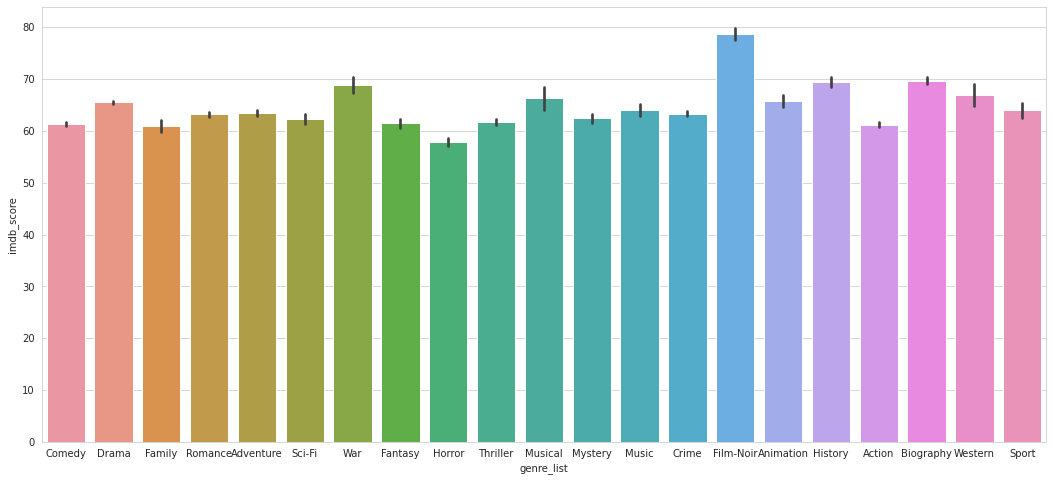

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(x = 'genre_list', y = 'imdb_score', data = rating_genre_explode)

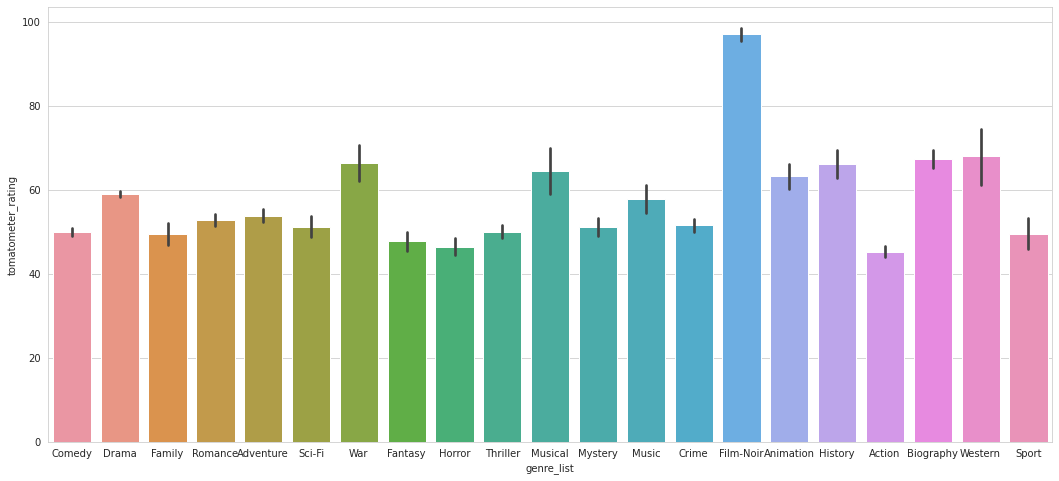

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(x = 'genre_list', y = 'tomatometer_rating', data = rating_genre_explode)

**Analysis Points**<br>
Based on the above 2 plots, we can clrealy following points about genre preference according to two rating systems:<br>
1. film-noir genre is more preferred in both of the rating system
2. Some genres like Animation, War, Western are equally preferred in both rating system.
3. Overall it seems that in tomatometer rating(usually most of the genres are rated around 50) the genre are rated less than Imdb ratings(usually most of the genres are rated around 60).
4. A good differnce in rating can be observed for following genre (usually for these genres, imdb mean rating is higher than rotten tomato mean rating)
  * Action
  * Comedy
  * Crime
  * Family
  * Thriller

we can also draw box plots using the above dataframe

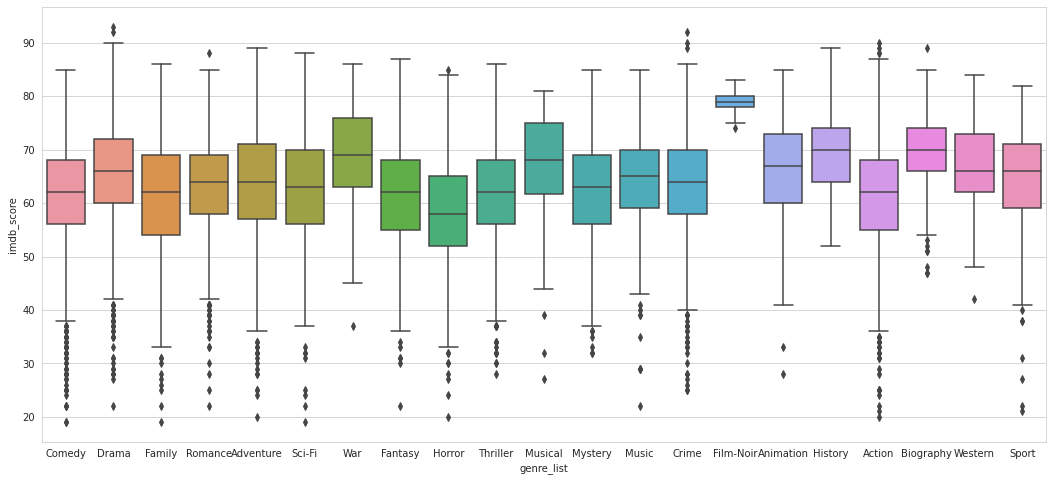

In [ ]:
plt.figure(figsize=(18,8))
sns.boxplot(x = 'genre_list', y = 'imdb_score', data = rating_genre_explode)

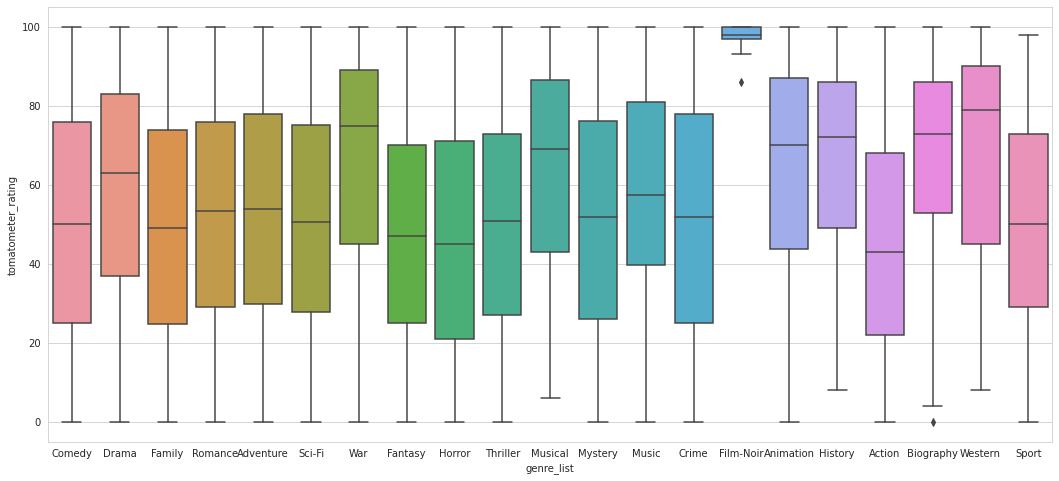

In [ ]:
plt.figure(figsize=(18,8))
sns.boxplot(x = 'genre_list', y = 'tomatometer_rating', data = rating_genre_explode)

80,90,100,100,100

## **3. Ratings Preference across year released**

In this case we have to analyse the relationship of ratings with year released.

year released - numerical

ratings - numerical

Two kinds of plots are useful here
* scatter plots
* box plots 


In [ ]:
final_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7148 entries, 0 to 7147
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              7148 non-null   int64  
 1   movie_title             7148 non-null   object 
 2   year                    7148 non-null   int64  
 3   genre                   7148 non-null   object 
 4   duration                7148 non-null   int64  
 5   country                 7148 non-null   object 
 6   language                7142 non-null   object 
 7   imdb_score              7148 non-null   float64
 8   worldwide_gross_income  7148 non-null   float64
 9   movie_age               7148 non-null   int64  
 10  tomatometer_rating      7143 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 614.4+ KB


In [ ]:
rating_year=final_movie_data[['year','imdb_score','tomatometer_rating']]
rating_year.head(5)


,year,imdb_score,tomatometer_rating
0,1921,83.0,100.0
1,1923,70.0,92.0
2,1925,82.0,100.0
3,1927,83.0,97.0
4,1927,81.0,98.0


In [ ]:
sns.set_style('whitegrid')

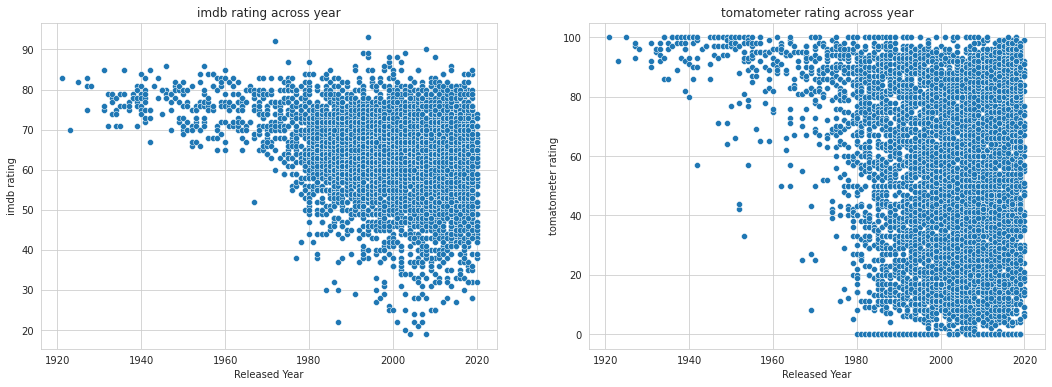

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(18,6))
axes[0].set_title('imdb rating across year')
axes[0].set_xlabel('Released Year')
axes[0].set_ylabel('imdb rating')
sns.scatterplot(x='year',y='imdb_score',data=rating_year,ax=axes[0]);
axes[1].set_title('tomatometer rating across year')
axes[1].set_xlabel('Released Year')
axes[1].set_ylabel('tomatometer rating')
sns.scatterplot(x='year',y='tomatometer_rating',data=rating_year,ax=axes[1]);


**Analysis Points**<br>
Based on the above scatter plot, we can clrealy observe following points about Released year preference according to two rating systems:<br>
1. After 1980 awareness of rating system increased and people started rated to movies at large scale.
2. Based on above 2 scatter plot we can clearly observe that imdb rating are mostly concentrated aroung the 50-70 range.
While tomatometer rating are very evenly distributed.
3.In both gragh we can observe old movies(before 1970) mostly get rating is higher end.
 

## **4. Ratings Preference across language**

In [ ]:
final_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7148 entries, 0 to 7147
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              7148 non-null   int64  
 1   movie_title             7148 non-null   object 
 2   year                    7148 non-null   int64  
 3   genre                   7148 non-null   object 
 4   duration                7148 non-null   int64  
 5   country                 7148 non-null   object 
 6   language                7142 non-null   object 
 7   imdb_score              7148 non-null   float64
 8   worldwide_gross_income  7148 non-null   float64
 9   movie_age               7148 non-null   int64  
 10  tomatometer_rating      7143 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 614.4+ KB


In [ ]:
rating_language=final_movie_data[['language','imdb_score','tomatometer_rating']]
rating_language.head(30)

,language,imdb_score,tomatometer_rating
0,"English, None",83.0,100.0
1,"None, English",70.0,92.0
2,"English, None",82.0,100.0
3,German,83.0,97.0
4,English,81.0,98.0
5,English,75.0,93.0
6,English,81.0,96.0
7,English,85.0,98.0
8,"English, Hungarian, Latin",75.0,92.0
9,English,76.0,90.0


In [ ]:
rating_language['language']=rating_language['language'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def convert_list(row):
    str_list=row.split(',')
    return [i.strip() for i in str_list]

In [ ]:
rating_language['language_list']=rating_language.apply(lambda x:convert_list(x['language']),axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
rating_language.drop(['language'],axis=1,inplace=True)
rating_language_explode=rating_language.explode('language_list')
rating_language_explode.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,imdb_score,tomatometer_rating,language_list
0,83.0,100.0,English
0,83.0,100.0,None
1,70.0,92.0,None
1,70.0,92.0,English
2,82.0,100.0,English


In [ ]:
none_list=list(rating_language_explode.loc[rating_language_explode.language_list=='None'].index)

In [ ]:
rating_language_explode.drop(none_list,inplace=True)

In [ ]:
rating_language_explode.groupby('language_list')['tomatometer_rating'].mean().reset_index().sort_values('tomatometer_rating',ascending=False).head()

,language_list,tomatometer_rating
81,Nama,96.0
72,Maltese,96.0
79,Mixtec,96.0
44,Greenlandic,96.0
61,Kinyarwanda,95.5


In [ ]:
rating_language_explode.groupby('language_list')['imdb_score'].mean().reset_index().sort_values('imdb_score',ascending=False).head()

,language_list,imdb_score
100,Quenya,89.0
83,Nepali,84.0
114,Sindarin,81.5
92,Pawnee,80.0
65,Kurdish,79.5


In [ ]:
rating_language_explode['language_list'].unique()

array(['German', 'English', 'Hungarian', 'Latin', 'French', 'Russian',
       'Italian', 'Arabic', 'Spanish', 'Esperanto', 'Swahili',
       'Portuguese', 'Cantonese', 'Japanese', 'American Sign Language',
       'Bengali', 'Thai', 'Turkish', 'Welsh', 'Chinese', 'Swedish',
       'Scottish Gaelic', 'Greek', 'Ancient (to 1453)', 'Sioux',
       'Yiddish', 'Hebrew', 'Kurdish', 'Irish', 'Navajo', 'Dutch',
       'Polish', 'Hindi', 'Aboriginal', 'Vietnamese', 'Norwegian',
       'Sindarin', 'Maltese', 'Romanian', 'Icelandic', 'Klingon',
       'Afrikaans', 'Ungwatsi', 'Serbo-Croatian', 'Ukrainian', 'Persian',
       'Nepali', 'Finnish', 'Quechua', 'Filipino', 'Berber languages',
       'Inuktitut', 'Sinhalese', 'Khmer', 'Maori', 'Mandarin', 'Guarani',
       'Urdu', 'Shanghainese', 'Czech', 'Slovak', 'Dari', 'Pushto',
       'Assyrian Neo-Aramaic', 'Ewe', 'Spanish Sign Language', 'Korean',
       'Brazilian Sign Language', 'Lao', 'Cree', 'Mohawk', 'Algonquin',
       'Hawaiian', 'North Ame

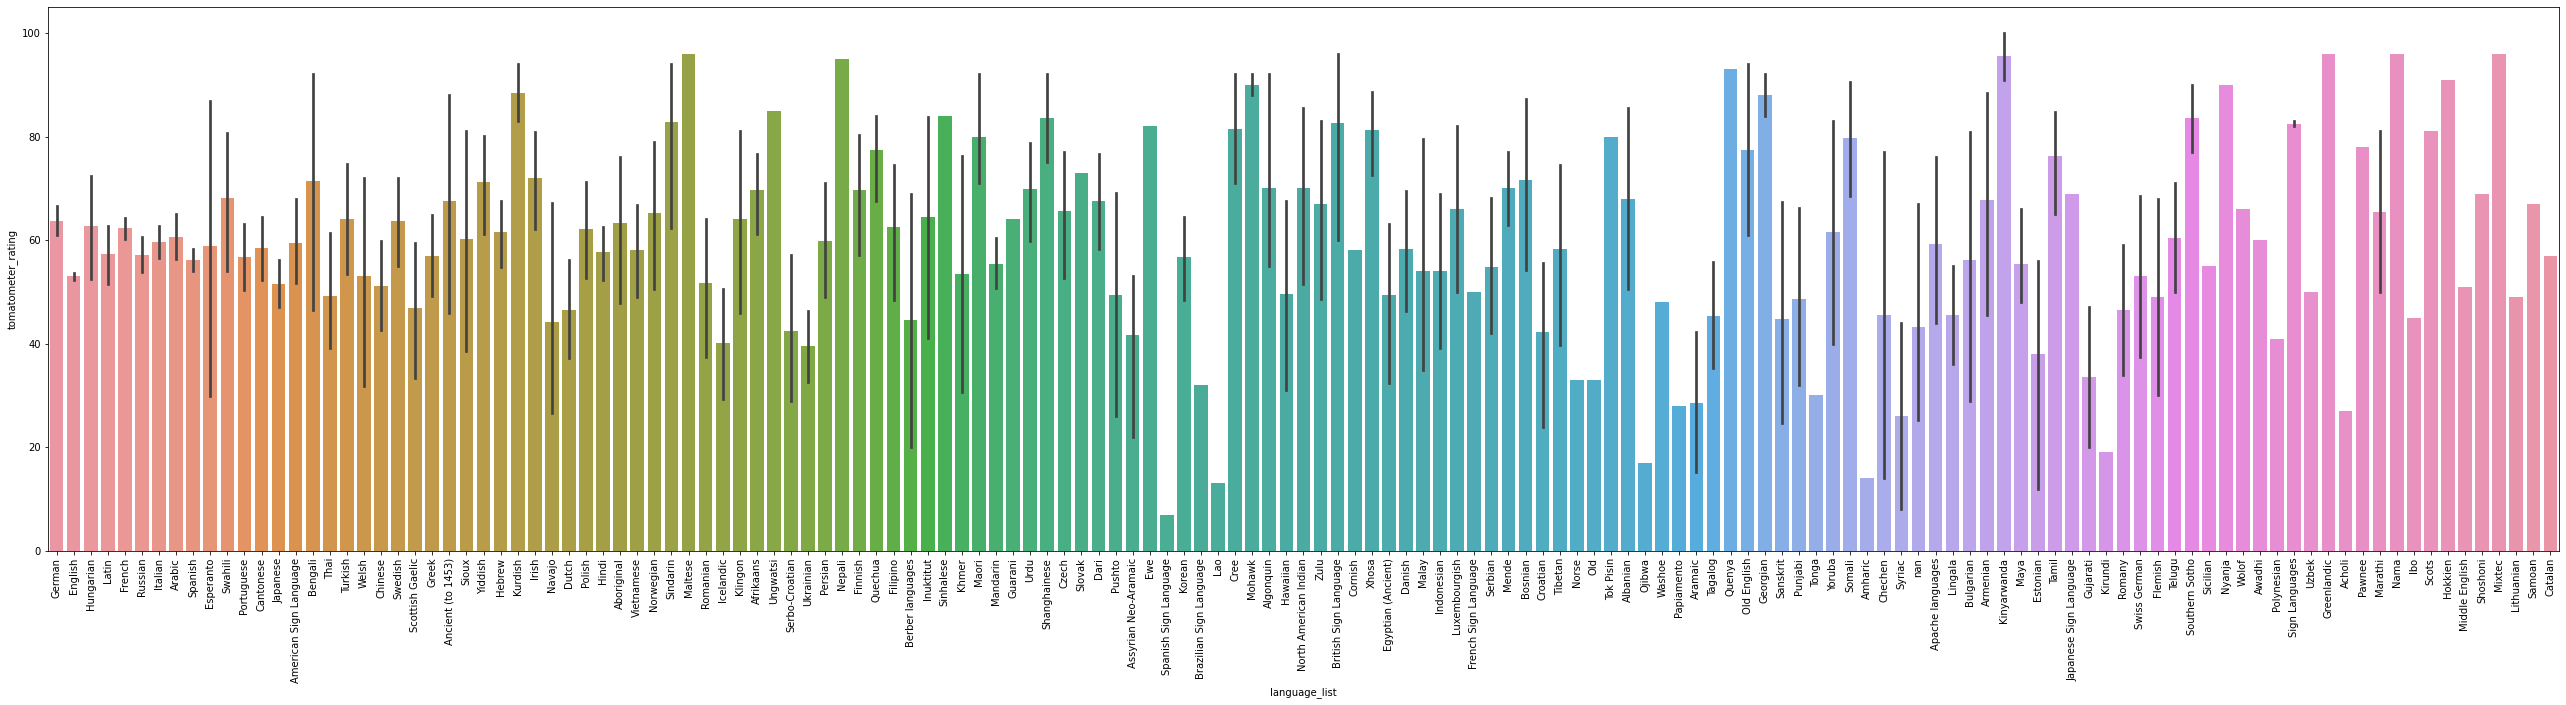

In [ ]:
plt.figure(figsize=(45,10))
plt.xticks(rotation='vertical')
sns.barplot(x='language_list',y='tomatometer_rating',data=rating_language_explode);

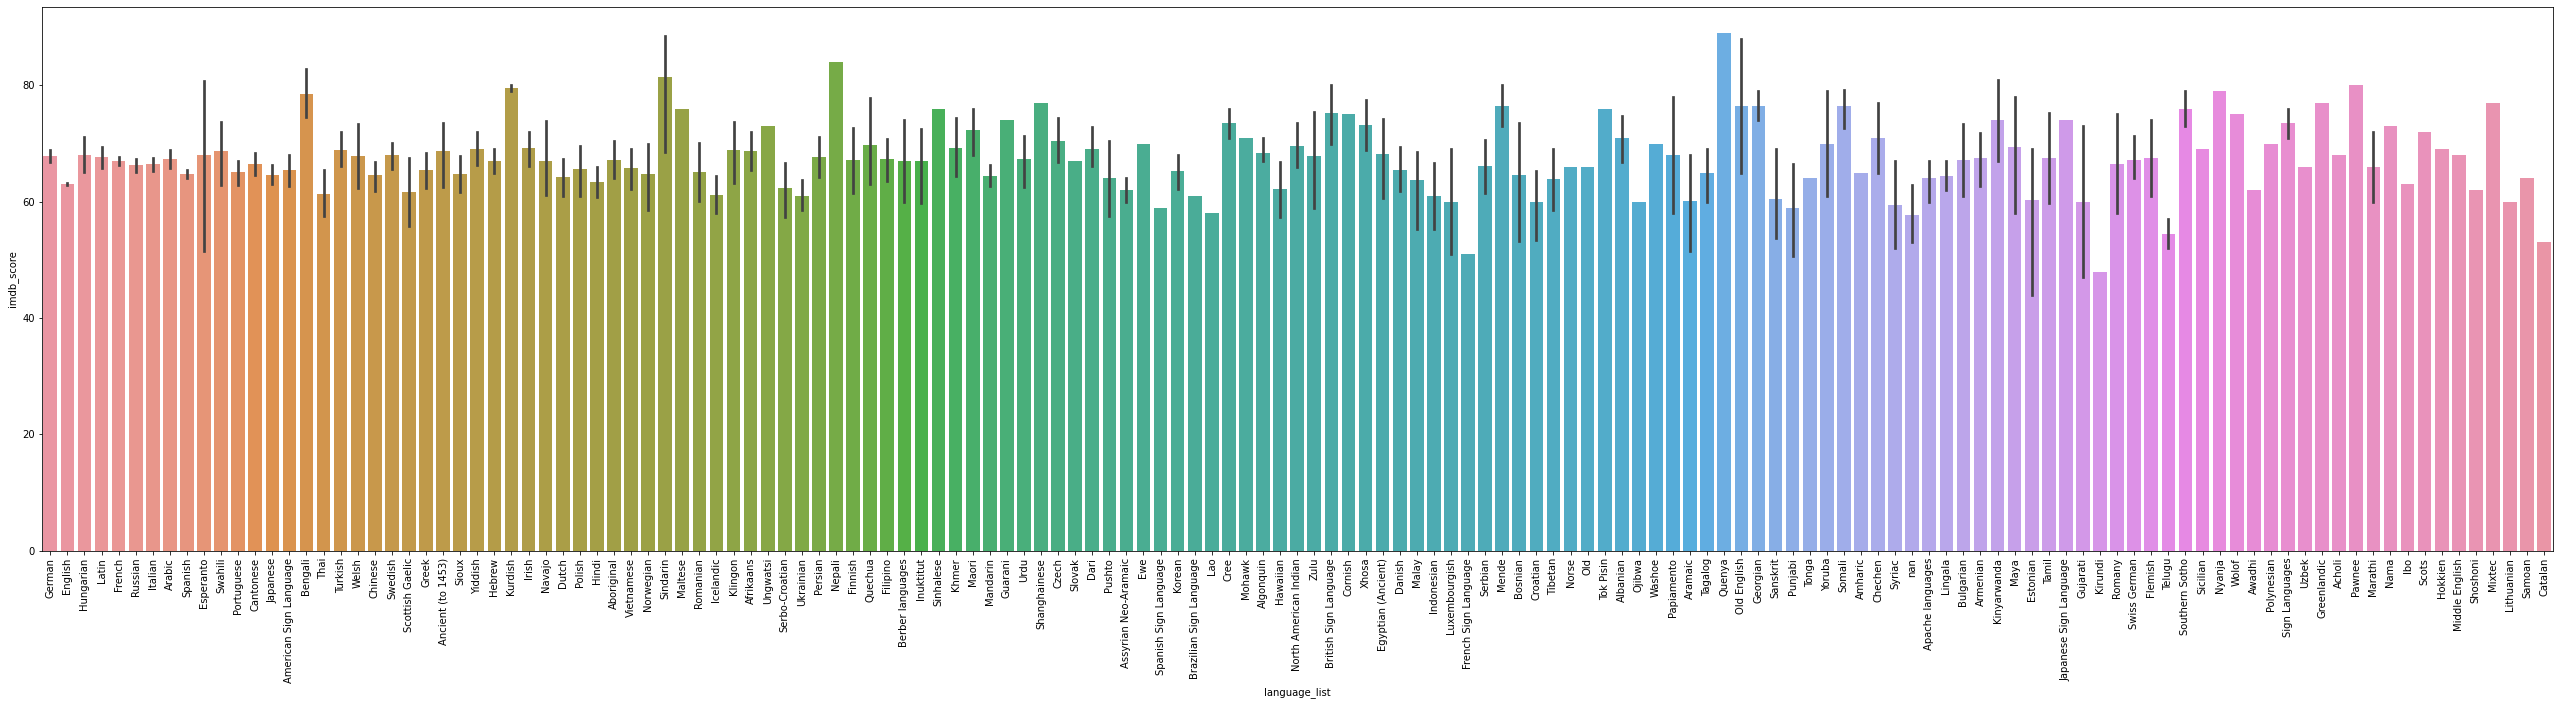

In [ ]:
plt.figure(figsize=(45,10))
plt.xticks(rotation='vertical')
sns.barplot(x='language_list',y='imdb_score',data=rating_language_explode);

**Final Analysis Points**

1.In both rating system Quenya and Nepali language mostly have the  high rated movies.

2.In imdb rating mostly movies geted high rating  more than 48.on other side in tomatometer_rating movies rating is evenly distributed

## **Ratings Preference across duration**

In [ ]:
final_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7148 entries, 0 to 7147
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              7148 non-null   int64  
 1   movie_title             7148 non-null   object 
 2   year                    7148 non-null   int64  
 3   genre                   7148 non-null   object 
 4   duration                7148 non-null   int64  
 5   country                 7148 non-null   object 
 6   language                7142 non-null   object 
 7   imdb_score              7148 non-null   float64
 8   worldwide_gross_income  7148 non-null   float64
 9   movie_age               7148 non-null   int64  
 10  tomatometer_rating      7143 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 614.4+ KB


In [ ]:
rating_duration=final_movie_data[['duration','imdb_score','tomatometer_rating']]
rating_duration.head()

,duration,imdb_score,tomatometer_rating
0,68,83.0,100.0
1,82,70.0,92.0
2,95,82.0,100.0
3,153,83.0,97.0
4,94,81.0,98.0


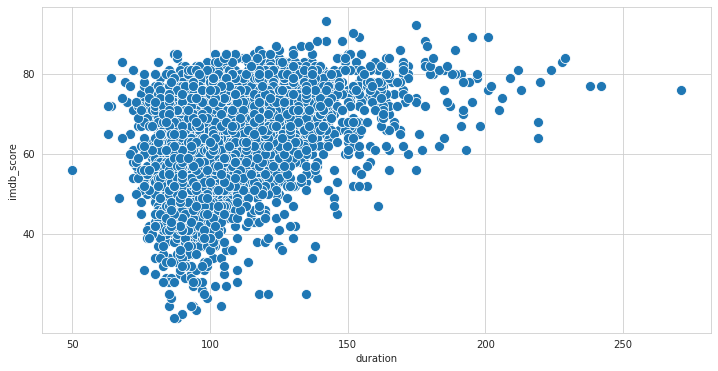

In [ ]:
plt.figure(figsize=(12,6))
plt.yticks(np.arange(40,301,20))
sns.scatterplot(x='duration',y='imdb_score',s=100,data=rating_duration);

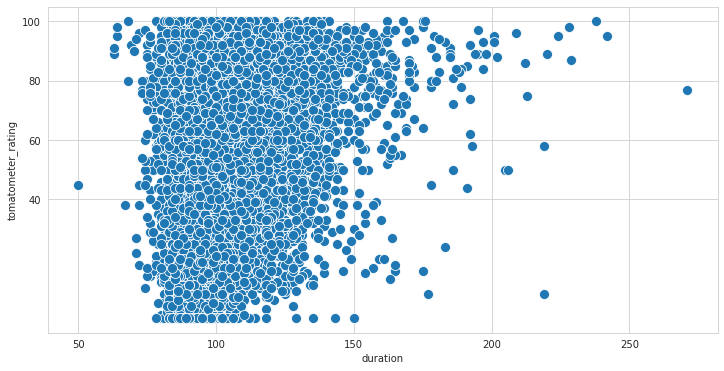

In [ ]:
plt.figure(figsize=(12,6))
plt.yticks(np.arange(40,301,20))
sns.scatterplot(y='tomatometer_rating',x='duration',s=100,data=rating_duration);

**Final Analysis Points**

1. Most of the  movies duration is less than 150 min.
2. Usually higher duration movies beyond 220 min has rating more than 64.

# **Movies earning potential analysis**

Using worldwide_gross_income column data we will analyse following points
1. **Analyse earning potential of movies** - analyse worldwide gross income column or distribution of worldwide gross income column
2. **Earning potential and Rating Comparison** -  does movies with higher rating have higher earning potential
3. **Earning potential and Genre Comparison** - does genre affect the earning of a movie
4. **Earning potential and country Comparison** - does the earning of a movie differ based on the country it is getting released into.
5. **Earning potential and language Comparison** - how does language affect earning of a movie
6. **Earning potential and duration Comparison** - do the earning of high and low duration movie differ

## **1. Analyse earning potential of movies**

In [ ]:
final_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7148 entries, 0 to 7147
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              7148 non-null   int64  
 1   movie_title             7148 non-null   object 
 2   year                    7148 non-null   int64  
 3   genre                   7148 non-null   object 
 4   duration                7148 non-null   int64  
 5   country                 7148 non-null   object 
 6   language                7142 non-null   object 
 7   imdb_score              7148 non-null   float64
 8   worldwide_gross_income  7148 non-null   float64
 9   movie_age               7148 non-null   int64  
 10  tomatometer_rating      7143 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 614.4+ KB


In [ ]:
final_movie_data['worldwide_gross_income'].sort_values().tail()

6592    2048.359754
6192    2068.224036
2423    2195.169869
4414    2790.439092
6593    2797.800564
Name: worldwide_gross_income, dtype: float64

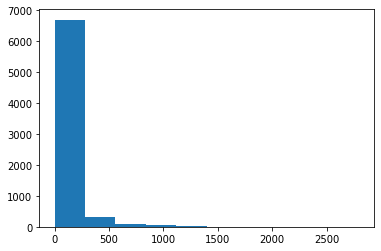

In [ ]:
plt.hist(final_movie_data.worldwide_gross_income);

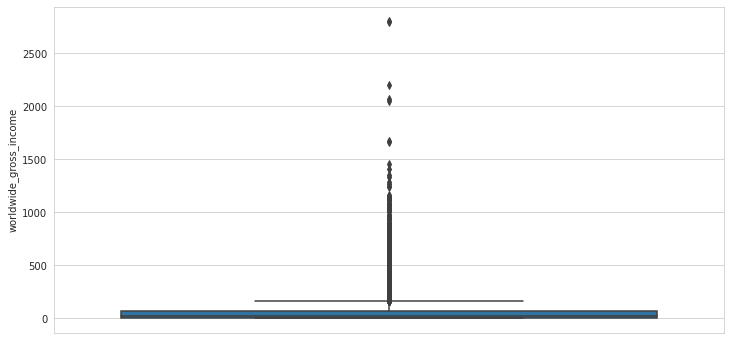

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(y='worldwide_gross_income',data=final_movie_data);

**Analysis Points**
1. Most of movies earning is under 162 milions
2. there are so many outlier in worldwide_gross_income,highest movie earning beyond 2500 


## **2. Earning potential and Rating Comparison**

In [ ]:
final_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7148 entries, 0 to 7147
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              7148 non-null   int64  
 1   movie_title             7148 non-null   object 
 2   year                    7148 non-null   int64  
 3   genre                   7148 non-null   object 
 4   duration                7148 non-null   int64  
 5   country                 7148 non-null   object 
 6   language                7142 non-null   object 
 7   imdb_score              7148 non-null   float64
 8   worldwide_gross_income  7148 non-null   float64
 9   movie_age               7148 non-null   int64  
 10  tomatometer_rating      7143 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 614.4+ KB


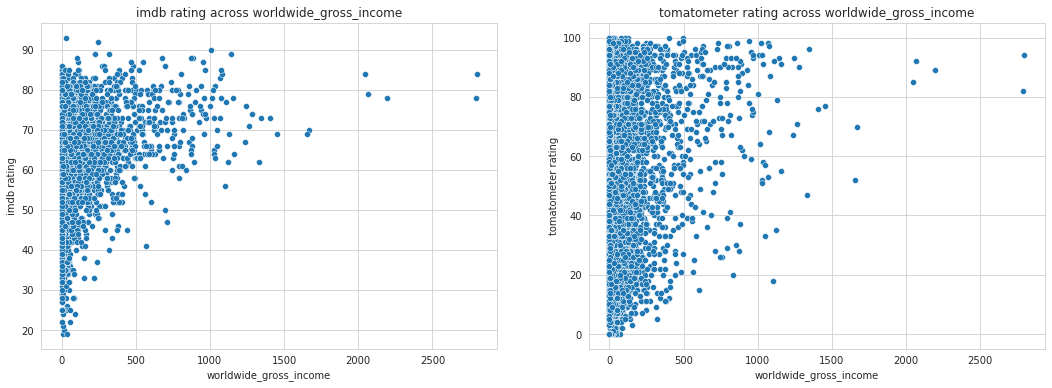

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(18,6))
axes[0].set_title('imdb rating across worldwide_gross_income')
axes[0].set_xlabel('worldwide_gross_income')
axes[0].set_ylabel('imdb rating')
sns.scatterplot(x='worldwide_gross_income',y='imdb_score',data=final_movie_data,ax=axes[0]);
axes[1].set_title('tomatometer rating across worldwide_gross_income')
axes[1].set_xlabel('worldwide_gross_income')
axes[1].set_ylabel('tomatometer rating')
sns.scatterplot(x='worldwide_gross_income',y='tomatometer_rating',data=final_movie_data,ax=axes[1]);

1.most of the movie gross income is less then 500

2.cleary we can says beyond 2000 both rating is above 75

3.Movies with very high earnings are usually rated better in both rating systems.

##**3. Earning potential and Genre Comparison**

In [ ]:
earning_potential_genre = final_movie_data[['genre','imdb_score','tomatometer_rating','worldwide_gross_income']]
earning_potential_genre.head()

,genre,imdb_score,tomatometer_rating,worldwide_gross_income
0,"Comedy, Drama, Family",83.0,100.0,0.026916
1,"Drama, Romance",70.0,92.0,0.011233
2,"Adventure, Comedy, Drama",82.0,100.0,0.026916
3,"Drama, Sci-Fi",83.0,97.0,1.349711
4,"Drama, Romance",81.0,98.0,0.121107


In [ ]:
def con_list(row):
    str_list=row.split(',')
    return [i.strip() for i in str_list]

In [ ]:
earning_potential_genre['genre_list']=earning_potential_genre.apply(lambda x:con_list(x['genre']),axis=1)
earning_potential_genre.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,genre,imdb_score,tomatometer_rating,worldwide_gross_income,genre_list
0,"Comedy, Drama, Family",83.0,100.0,0.026916,"[Comedy, Drama, Family]"
1,"Drama, Romance",70.0,92.0,0.011233,"[Drama, Romance]"
2,"Adventure, Comedy, Drama",82.0,100.0,0.026916,"[Adventure, Comedy, Drama]"
3,"Drama, Sci-Fi",83.0,97.0,1.349711,"[Drama, Sci-Fi]"
4,"Drama, Romance",81.0,98.0,0.121107,"[Drama, Romance]"


In [ ]:
earning_potential_genre.drop(['genre'],axis=1,inplace=True)
earning_potential_genre_explode=earning_potential_genre.explode('genre_list')
earning_potential_genre_explode.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,imdb_score,tomatometer_rating,worldwide_gross_income,genre_list
0,83.0,100.0,0.026916,Comedy
0,83.0,100.0,0.026916,Drama
0,83.0,100.0,0.026916,Family
1,70.0,92.0,0.011233,Drama
1,70.0,92.0,0.011233,Romance


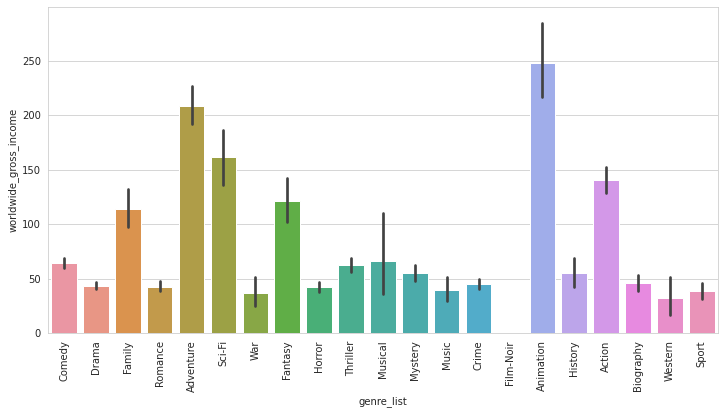

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation='vertical')
sns.barplot(x='genre_list',y='worldwide_gross_income',data=earning_potential_genre_explode);

**Analysis Points**

Here we can clearly see that some genres have very earning potential. Most of them have mediocre earning potential.

1. Genres with earning potnential more than 100 million.

* Action
* Adventure
* Animation
* Family
* Fantasy
* Sci-Fi


2. Most of the other genres have mediocre earning potential of around 50 million.

3. Film noir has the lowest earning potnential means this kind of genre movies do not profitable

##4. **Earning potential and country Comparison**

In [ ]:
final_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7148 entries, 0 to 7147
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              7148 non-null   int64  
 1   movie_title             7148 non-null   object 
 2   year                    7148 non-null   int64  
 3   genre                   7148 non-null   object 
 4   duration                7148 non-null   int64  
 5   country                 7148 non-null   object 
 6   language                7142 non-null   object 
 7   imdb_score              7148 non-null   float64
 8   worldwide_gross_income  7148 non-null   float64
 9   movie_age               7148 non-null   int64  
 10  tomatometer_rating      7143 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 614.4+ KB


In [ ]:
earning_potential_country=final_movie_data[['country','worldwide_gross_income']].copy()
earning_potential_country.head()

,country,worldwide_gross_income
0,USA,0.026916
1,USA,0.011233
2,USA,0.026916
3,Germany,1.349711
4,USA,0.121107


In [ ]:
earning_potential_country['country_list']=earning_potential_country.apply(lambda x:con_list(x['country']),axis=1)
earning_potential_country.head()

,country,worldwide_gross_income,country_list
0,USA,0.026916,[USA]
1,USA,0.011233,[USA]
2,USA,0.026916,[USA]
3,Germany,1.349711,[Germany]
4,USA,0.121107,[USA]


In [ ]:
earning_potential_country.drop(['country'],axis=1,inplace=True)
earning_potential_country_explode=earning_potential_country.explode('country_list')
earning_potential_country_explode.head()

,worldwide_gross_income,country_list
0,0.026916,USA
1,0.011233,USA
2,0.026916,USA
3,1.349711,Germany
4,0.121107,USA


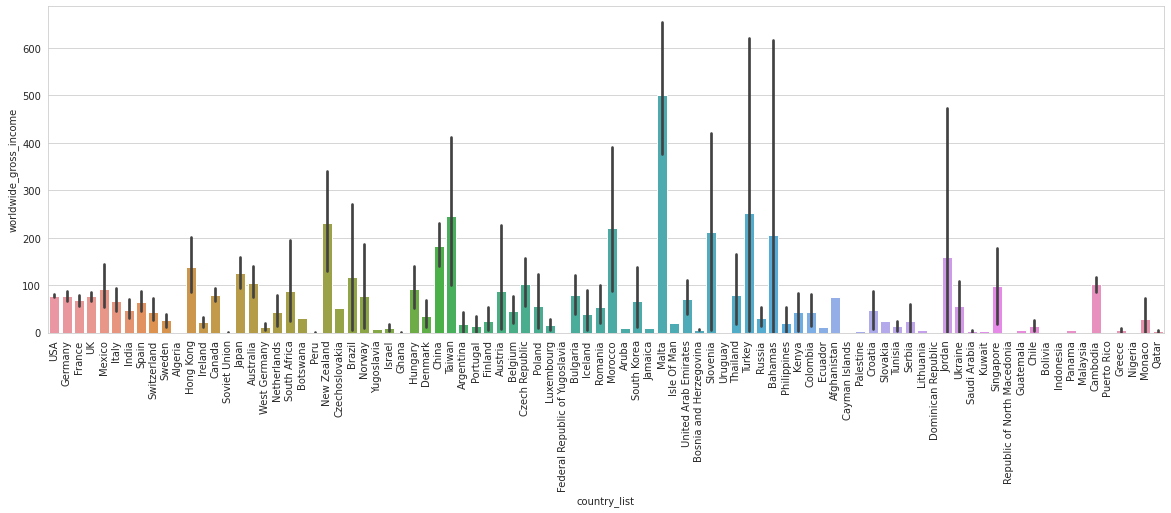

In [ ]:
plt.figure(figsize=(20,6))
plt.xticks(rotation='vertical')
sns.barplot(x='country_list',y='worldwide_gross_income',data=earning_potential_country_explode);

**Analysis Points**
1. Movies released in Malta country has highest earning.
2. Here we can clearly see that some country have very earning potential. Most of them have mediocre earning potential.

 country with earning potnential more than 200 million.

* Malta 
* New Zealand
* Taiwan
* Morocco
* Slovenia
* Turkey
* Bahamas




##**Earning potential and language Comparison**

In [ ]:
final_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7148 entries, 0 to 7147
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              7148 non-null   int64  
 1   movie_title             7148 non-null   object 
 2   year                    7148 non-null   int64  
 3   genre                   7148 non-null   object 
 4   duration                7148 non-null   int64  
 5   country                 7148 non-null   object 
 6   language                7142 non-null   object 
 7   imdb_score              7148 non-null   float64
 8   worldwide_gross_income  7148 non-null   float64
 9   movie_age               7148 non-null   int64  
 10  tomatometer_rating      7143 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 614.4+ KB


In [ ]:
earning_potential_language=final_movie_data[['movie_title','language','worldwide_gross_income']]
earning_potential_language.head()

,movie_title,language,worldwide_gross_income
0,The Kid,"English, None",0.026916
1,A Woman of Paris: A Drama of Fate,"None, English",0.011233
2,The Gold Rush,"English, None",0.026916
3,Metropolis,German,1.349711
4,Sunrise: A Song of Two Humans,English,0.121107


In [ ]:
def convert_language_list(row):
  return [x.strip() for x in row.split(',')]

In [ ]:
earning_potential_language['language']=earning_potential_language['language'].astype(str)
earning_potential_language['language']=earning_potential_language.apply(lambda row:convert_language_list(row['language']),axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
earning_language_explode=earning_potential_language.explode('language').copy()

In [ ]:
earning_language_explode

,movie_title,language,worldwide_gross_income
0,The Kid,English,0.026916
0,The Kid,None,0.026916
1,A Woman of Paris: A Drama of Fate,None,0.011233
1,A Woman of Paris: A Drama of Fate,English,0.011233
2,The Gold Rush,English,0.026916
...,...,...,...
7143,The Sound of Silence,English,0.021994
7144,Jexi,English,9.341824
7145,The Death of Dick Long,English,0.036856
7146,The King of Staten Island,English,2.060358


In [ ]:
earning_language_explode['language'].unique()

array(['English', 'None', 'German', 'Hungarian', 'Latin', 'French',
       'Russian', 'Italian', 'Arabic', 'Spanish', 'Esperanto', 'Swahili',
       'Portuguese', 'Cantonese', 'Japanese', 'American Sign Language',
       'Bengali', 'Thai', 'Turkish', 'Welsh', 'Chinese', 'Swedish',
       'Scottish Gaelic', 'Greek', 'Ancient (to 1453)', 'Sioux',
       'Yiddish', 'Hebrew', 'Kurdish', 'Irish', 'Navajo', 'Dutch',
       'Polish', 'Hindi', 'Aboriginal', 'Vietnamese', 'Norwegian',
       'Sindarin', 'Maltese', 'Romanian', 'Icelandic', 'Klingon',
       'Afrikaans', 'Ungwatsi', 'Serbo-Croatian', 'Ukrainian', 'Persian',
       'Nepali', 'Finnish', 'Quechua', 'Filipino', 'Berber languages',
       'Inuktitut', 'Sinhalese', 'Khmer', 'Maori', 'Mandarin', 'Guarani',
       'Urdu', 'Shanghainese', 'Czech', 'Slovak', 'Dari', 'Pushto',
       'Assyrian Neo-Aramaic', 'Ewe', 'Spanish Sign Language', 'Korean',
       'Brazilian Sign Language', 'Lao', 'Cree', 'Mohawk', 'Algonquin',
       'Hawaiian', 'N

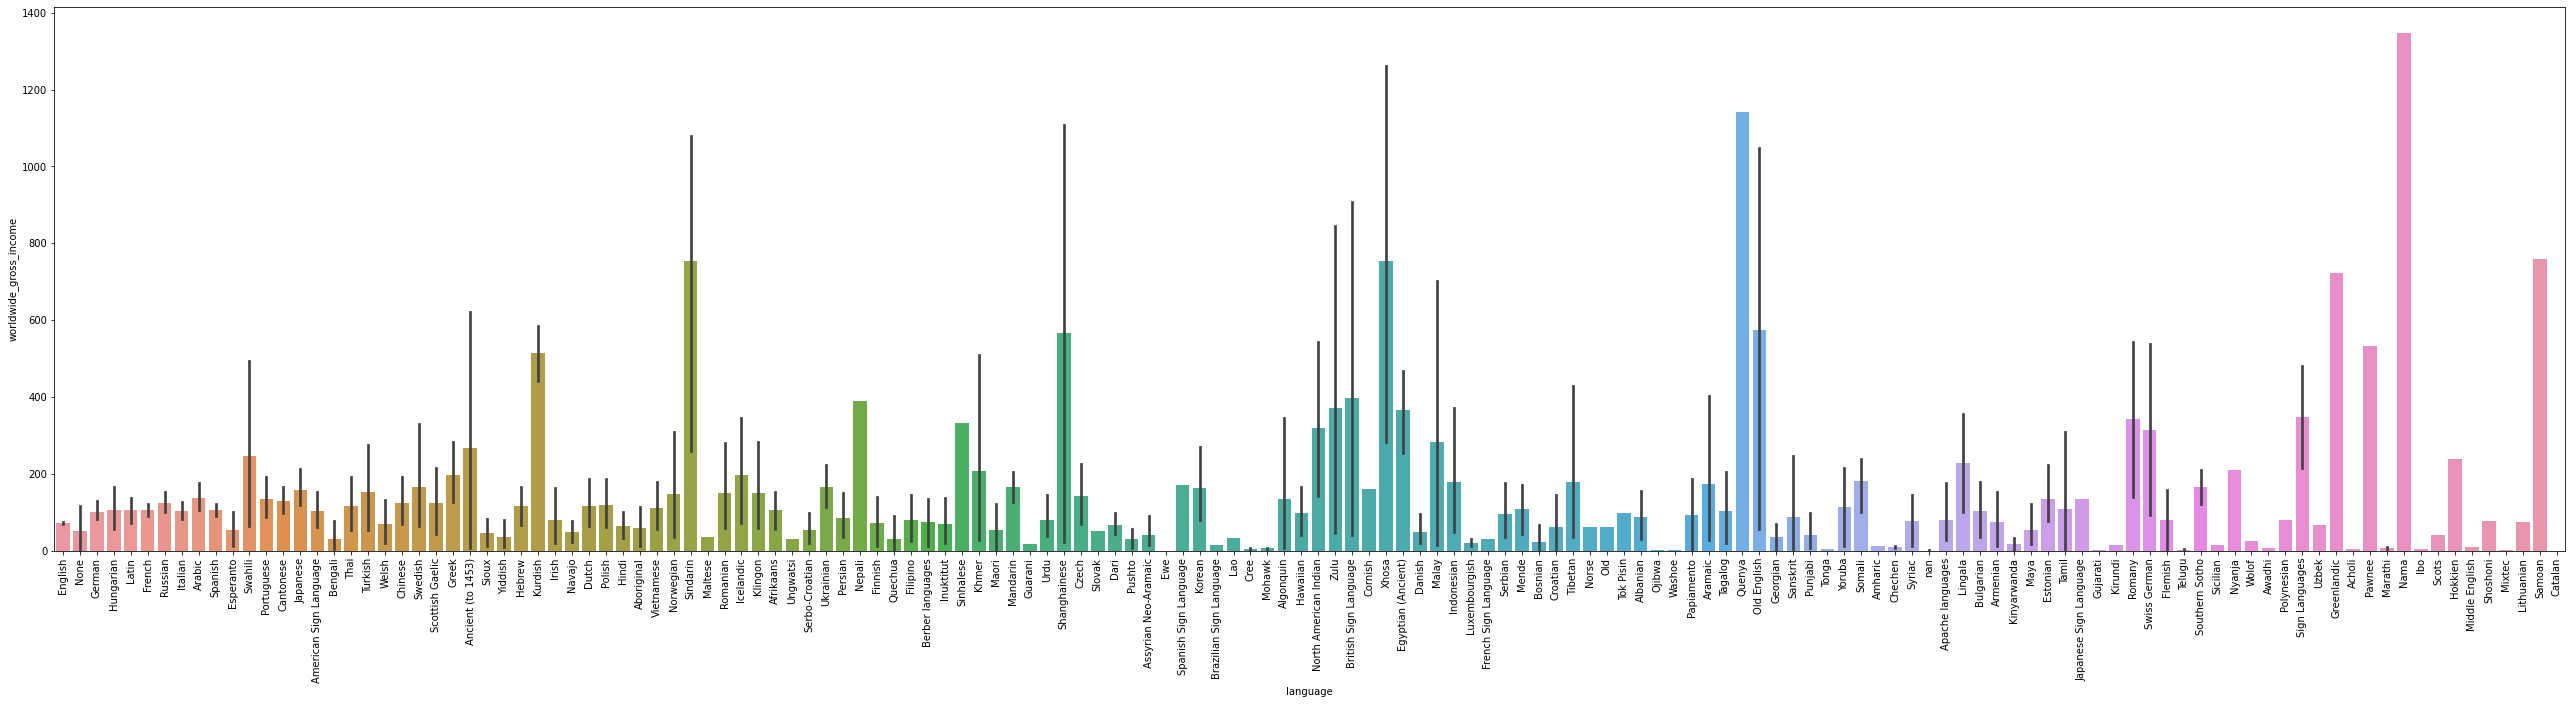

In [ ]:
plt.figure(figsize=(45,10))
plt.xticks(rotation='vertical')
sns.barplot(x='language',y='worldwide_gross_income',data=earning_language_explode);

**Analysis points**

1. Nama language movie has the highest earning potential.
2. Top 2 highest movie langauge based on earning potential-
  1. Nama
  2. Quenya
3. Other langauge in which some movie earning above the 1000 Millions
   1. Sindarin
   2. Shanghainese
   3. Xhosa
   4. old english

##6. **Earning potential and duration Comparison**

In [ ]:
final_movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7148 entries, 0 to 7147
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              7148 non-null   int64  
 1   movie_title             7148 non-null   object 
 2   year                    7148 non-null   int64  
 3   genre                   7148 non-null   object 
 4   duration                7148 non-null   int64  
 5   country                 7148 non-null   object 
 6   language                7142 non-null   object 
 7   imdb_score              7148 non-null   float64
 8   worldwide_gross_income  7148 non-null   float64
 9   movie_age               7148 non-null   int64  
 10  tomatometer_rating      7143 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 614.4+ KB


In [ ]:
earn_potential_duration=final_movie_data[['duration','worldwide_gross_income']]
earn_potential_duration.head()

,duration,worldwide_gross_income
0,68,0.026916
1,82,0.011233
2,95,0.026916
3,153,1.349711
4,94,0.121107


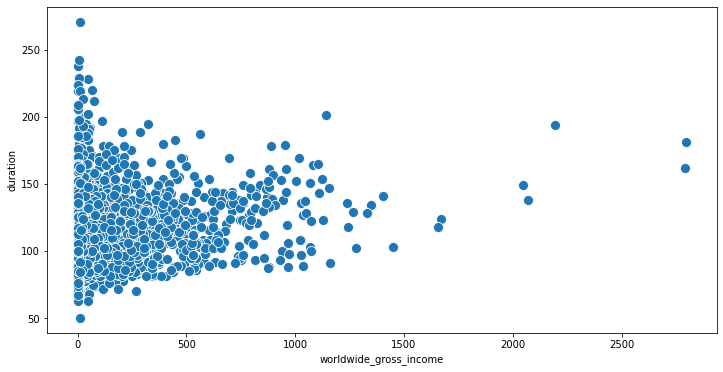

In [ ]:
plt.figure(figsize=(12,6))
#plt.xticks(np.arange(40,301,20))
sns.scatterplot(x='worldwide_gross_income',y='duration',s=100,data=earn_potential_duration);

**Analysis Points**
1. Highest earning movie duration lie between the 160 to 205.
2. Most of the  movies duration is less than 200 min.
2. Usually higher earning movies beyond 2000 millions has duartion not more than 210 min .